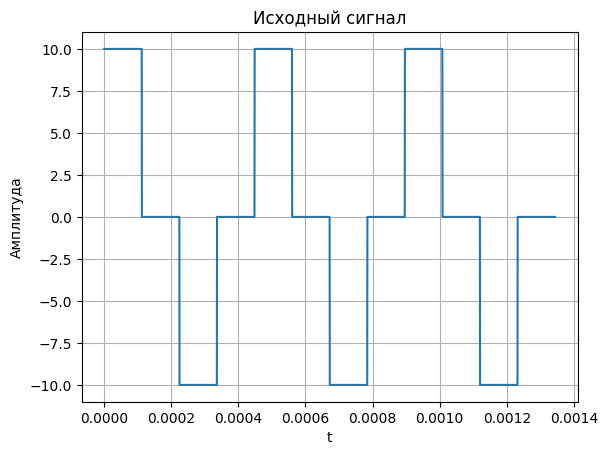

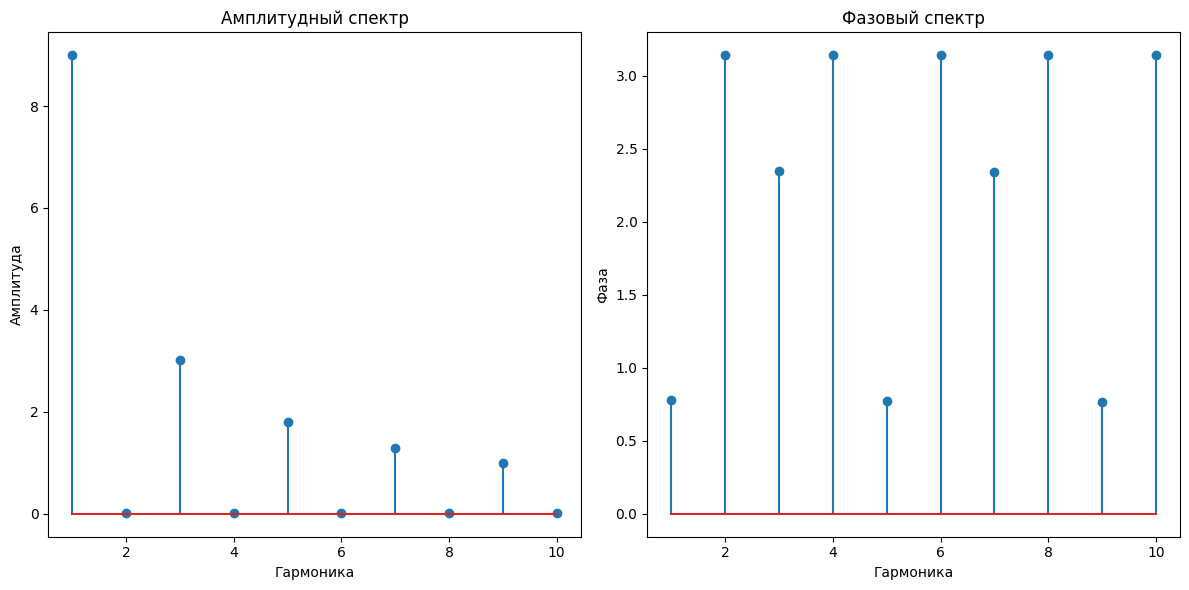

Средняя мощность сигнала: 49.925000000000416
Количество гармоник:
Для 10% потерь: 3
Для 5% потерь: 7
Для 2% потерь: 19
Для 1% потерь: 39
Для 0.1% потерь: 253

Амплитуды гармоник:
n=1: 8.996
n=2: 0.010
n=3: 3.008
n=4: 0.010
n=5: 1.794
n=6: 0.010
n=7: 1.293
n=8: 0.010
n=9: 0.993
n=10: 0.010

Фазы гармоник:
n=1: 0.783
n=2: 3.142
n=3: 2.349
n=4: 3.142
n=5: 0.774
n=6: 3.142
n=7: 2.340
n=8: 3.142
n=9: 0.764
n=10: 3.142


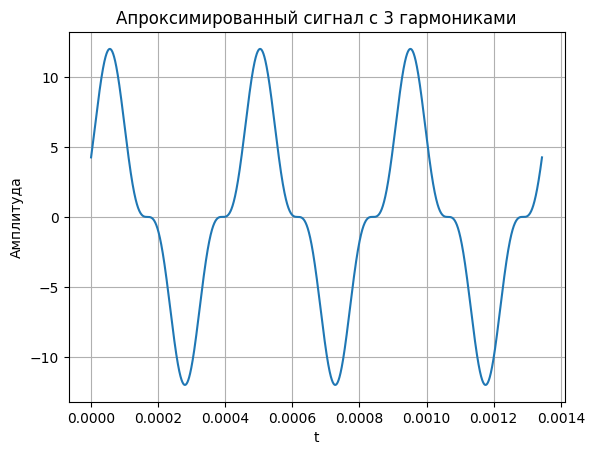

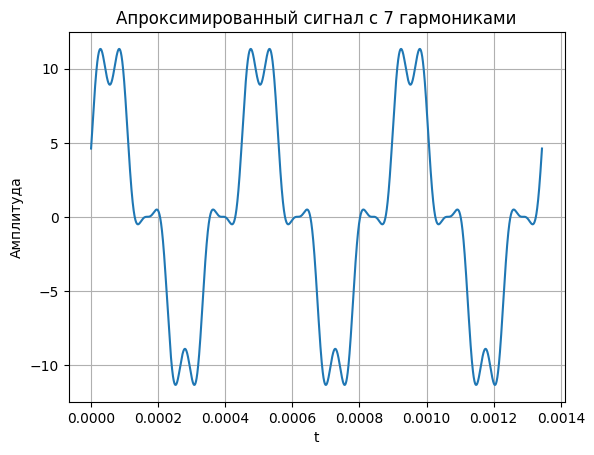

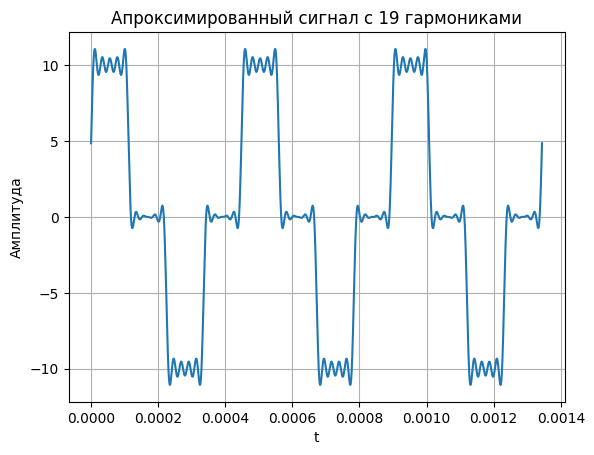

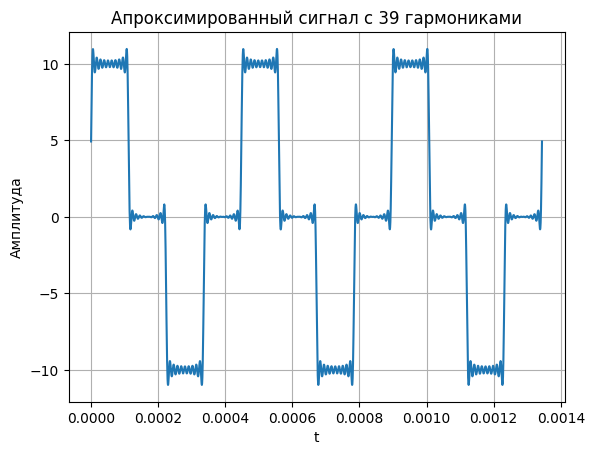

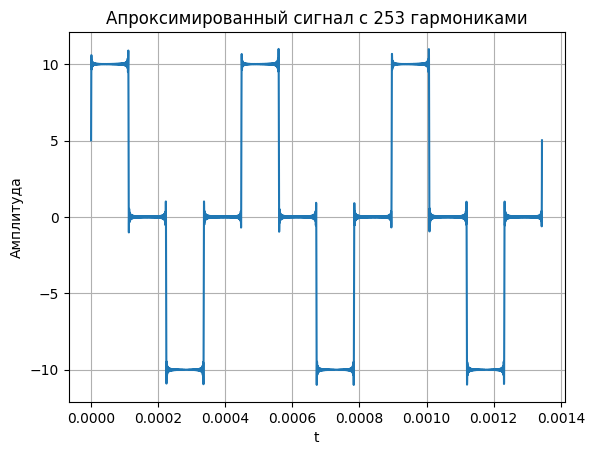

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = 112 * (10 ** (-6))
T = 4 * t
Emax = 10
w = 2 * np.pi / T

def modified_rectangular_signal(x):
    while x > T:
        x -= T
    while x < 0:
        x += T

    quarter = T / 4


    if 0 <= x < quarter:
        return Emax
    elif quarter <= x < 2 * quarter:
        return 0
    elif 2 * quarter <= x < 3 * quarter:
        return -Emax
    else:
        return 0

# Функция для расчета коэффициентов Фурье
def func_a_0():
  a = 0
  b = T
  h = (b - a)/1000
  result = 0
  for i in np.arange(a, b + h, h):
    if i == a or i == b:
      result += modified_rectangular_signal(i)
    else:
      result += 2 * modified_rectangular_signal(i)
  return (2 / T) * result * (h / 2)

def func_a_n(n):
  a = 0
  b = T
  h = (b - a) / 1000
  result = 0
  for i in np.arange(a, b + h, h):
    if i == a or i == b:
      result += modified_rectangular_signal(i) * np.cos(n * w * i)
    else:
      result += 2 * modified_rectangular_signal(i) * np.cos(n * w * i)
  return (2 / T) * result * (h / 2)

def func_b_n(n):
  a = 0
  b = T
  h = (b - a) / 1000
  result = 0
  for i in np.arange(a, b + h, h):
    if i == a or i == b:
      result += modified_rectangular_signal(i) * np.sin(n * w * i)
    else:
      result += 2 * modified_rectangular_signal(i) * np.sin(n * w * i)
  return (2 / T) * result * (h / 2)

a_n = []
b_n = []

for n in range(1, 501):
  a_n.append(func_a_n(n))
  b_n.append(func_b_n(n))

x_values = np.linspace(0, 3 * T, 5000)
y_values = [modified_rectangular_signal(x) for x in x_values]

plt.plot(x_values, y_values)
plt.title("Исходный сигнал")
plt.xlabel("t")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

amplitudes = [np.sqrt(a_n[i] ** 2 + b_n[i] ** 2) for i in range(len(a_n))]
phases = [np.arctan2(b_n[i], a_n[i]) for i in range(len(a_n))]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.stem(range(1, 11), amplitudes[:10])
plt.title("Амплитудный спектр")
plt.xlabel("Гармоника")
plt.ylabel("Амплитуда")

plt.subplot(1, 2, 2)
plt.stem(range(1, 11), phases[:10])
plt.title("Фазовый спектр")
plt.xlabel("Гармоника")
plt.ylabel("Фаза")

plt.tight_layout()
plt.show()

# Расчет средней мощности сигнала
P_c = 0
for i in range(len(amplitudes)):
  P_c += (amplitudes[i] ** 2) / 2

print(f"Средняя мощность сигнала: {P_c}")

# Расчет накопленной мощности
P_k = [0]

for n_max in range(1, 501):
  P_k.append(0)
  for n in range(1, n_max+1):
    P_k[n_max] += a_n[n-1] * a_n[n-1] + b_n[n-1] * b_n[n-1]
  P_k[n_max] *= 0.5
  P_k[n_max] += (func_a_0() ** 2) / 2

# Расчет относительной ошибки
P_final = []
for i in range(1, 501):
  P_final.append(abs(P_k[i] - P_c) / P_c * 100)

n_chart = []

for i in range(500):
  if P_final[i] <= 10:
    n_chart.append(i+1)
    break
for i in range(500):
  if P_final[i] <= 5:
    n_chart.append(i + 1)
    break
for i in range(500):
  if P_final[i] <= 2:
    n_chart.append(i + 1)
    break
for i in range(500):
  if P_final[i] <= 1:
    n_chart.append(i + 1)
    break
for i in range(500):
  if P_final[i] <= 0.1:
    n_chart.append(i + 1)
    break

print("Количество гармоник:")
print(f"Для 10% потерь: {n_chart[0]}")
print(f"Для 5% потерь: {n_chart[1]}")
print(f"Для 2% потерь: {n_chart[2]}")
print(f"Для 1% потерь: {n_chart[3]}")
print(f"Для 0.1% потерь: {n_chart[4]}")

print("\nАмплитуды гармоник:")
for i in range(10):
    print(f"n={i+1}: {amplitudes[i]:.3f}")

print("\nФазы гармоник:")
for i in range(10):
    print(f"n={i+1}: {phases[i]:.3f}")



for idx in range(5):
  s_values = []
  for i in x_values:
    s = 0
    for n in range(1, n_chart[idx] + 1):
      s += a_n[n-1] * np.cos(n * w * i) + b_n[n-1] * np.sin(n * w * i)
    s += func_a_0() / 2
    s_values.append(s)

  plt.figure()
  plt.plot(x_values, s_values)
  plt.title(f"Апроксимированный сигнал с {n_chart[idx]} гармониками")
  plt.xlabel("t")
  plt.ylabel("Амплитуда")
  plt.grid(True)
  plt.show()
